#  Sentiment Analysis using RNN, LSTM, and GRU

This project performs **sentiment analysis** on Amazon product reviews using **Recurrent Neural Network (RNN)** architectures such as:
- SimpleRNN  
- Long Short-Term Memory (LSTM)  
- Gated Recurrent Unit (GRU)

The dataset contains customer reviews and their corresponding ratings. Reviews are preprocessed, tokenized, and converted into padded sequences before being fed into different RNN-based models to predict whether a review is **positive** or **negative**.

###  Project Workflow
1. **Data Preprocessing**  
   - Load and clean the dataset  
   - Convert numerical ratings into binary sentiments  
   - Tokenize and pad text sequences  

2. **Model Building**  
   - Create models using SimpleRNN, LSTM, and GRU layers  
   - Train each model for 5 epochs  
   - Compare model performances  

3. **Evaluation & Visualization**  
   - Evaluate models on test data  
   - Plot accuracy and loss graphs for comparison  

###  Libraries Used
- `pandas`, `numpy` – for data handling  
- `tensorflow.keras` – for model building  
- `matplotlib` – for visualization  

###  Objective
To compare how different RNN architectures perform on sentiment classification tasks and analyze their accuracy on test data.


In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('archive/Reviews.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
df = df[['Text', 'Score']]  # Keep only relevant columns
df.dropna(subset=['Text'], inplace=True)  # Drop missing text entries


In [6]:
# Convert Score to binary sentiment (e.g., Score >= 4 positive, <= 2 negative)
df = df[df['Score'] != 3]  # Remove neutral
df['Sentiment'] = df['Score'].apply(lambda x: 1 if x >= 4 else 0)


In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Parameters
max_words = 10000
max_len = 100

# Tokenize
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Text'])

sequences = tokenizer.texts_to_sequences(df['Text'])
padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Labels
labels = df['Sentiment'].values


2025-09-18 09:57:27.487324: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-18 09:57:27.646345: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758169647.700417    5357 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758169647.716311    5357 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758169647.848509    5357 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    padded, labels, test_size=0.2, random_state=42
)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam

def build_model(cell_type='SimpleRNN'):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
    
    if cell_type == 'SimpleRNN':
        model.add(SimpleRNN(64))
    elif cell_type == 'LSTM':
        model.add(LSTM(64))
    elif cell_type == 'GRU':
        model.add(GRU(64))
        
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model


In [10]:
history_rnn = build_model('SimpleRNN').fit(X_train, y_train, epochs=5, batch_size=128,
                                           validation_split=0.2, verbose=1)

history_lstm = build_model('LSTM').fit(X_train, y_train, epochs=5, batch_size=128,
                                       validation_split=0.2, verbose=1)

history_gru = build_model('GRU').fit(X_train, y_train, epochs=5, batch_size=128,
                                     validation_split=0.2, verbose=1)


Epoch 1/5


/home/ai-a2/.local/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-09-18 09:58:00.628748: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


2630/2630 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.8441 - loss: 0.4301 - val_accuracy: 0.8491 - val_loss: 0.4172
Epoch 2/5
2630/2630 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.8531 - loss: 0.4015 - val_accuracy: 0.8552 - val_loss: 0.4039
Epoch 3/5
2630/2630 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.8586 - loss: 0.3921 - val_accuracy: 0.8502 - val_loss: 0.4136
Epoch 4/5
2630/2630 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.8637 - loss: 0.3784 - val_accuracy: 0.8490 - val_loss: 0.4081
Epoch 5/5
2630/2630 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.8615 - loss: 0.3834 - val_accuracy: 0.8545 - val_loss: 0.3995
Epoch 1/5
2630/2630 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.8534 - loss: 0.3990 - val_accuracy: 0.9325 - val_loss: 0.1733
Epoch 2/5
2630/2630 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9417 - loss: 0.1539 - val_accuracy: 0.9482 - val_loss: 0.1385
Epoch 3/5
2630/2630 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9574 - loss: 0.1156 - va

In [11]:
rnn_model = build_model('SimpleRNN')
rnn_model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)
rnn_eval = rnn_model.evaluate(X_test, y_test)

lstm_model = build_model('LSTM')
lstm_model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)
lstm_eval = lstm_model.evaluate(X_test, y_test)

gru_model = build_model('GRU')
gru_model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)
gru_eval = gru_model.evaluate(X_test, y_test)

print(f"RNN Test Accuracy:  {rnn_eval[1]:.4f}")
print(f"LSTM Test Accuracy: {lstm_eval[1]:.4f}")
print(f"GRU Test Accuracy:  {gru_eval[1]:.4f}")


Epoch 1/5
2630/2630 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.8416 - loss: 0.4331 - val_accuracy: 0.8467 - val_loss: 0.4188
Epoch 2/5
2630/2630 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.8521 - loss: 0.3998 - val_accuracy: 0.8467 - val_loss: 0.4233
Epoch 3/5
2630/2630 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.8574 - loss: 0.3932 - val_accuracy: 0.8466 - val_loss: 0.4235
Epoch 4/5
2630/2630 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.8587 - loss: 0.3900 - val_accuracy: 0.8472 - val_loss: 0.4120
Epoch 5/5
2630/2630 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.8646 - loss: 0.3751 - val_accuracy: 0.8433 - val_loss: 0.4330
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8414 - loss: 0.4333
Epoch 1/5
2630/2630 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.8626 - loss: 0.3633 - val_accuracy: 0.9370 - val_loss: 0.1683
Epoch 2/5
2630/2630 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9470 - loss: 0.1415 - val_accuracy: 0.9506 - val_loss: 0.1341
Epoch 

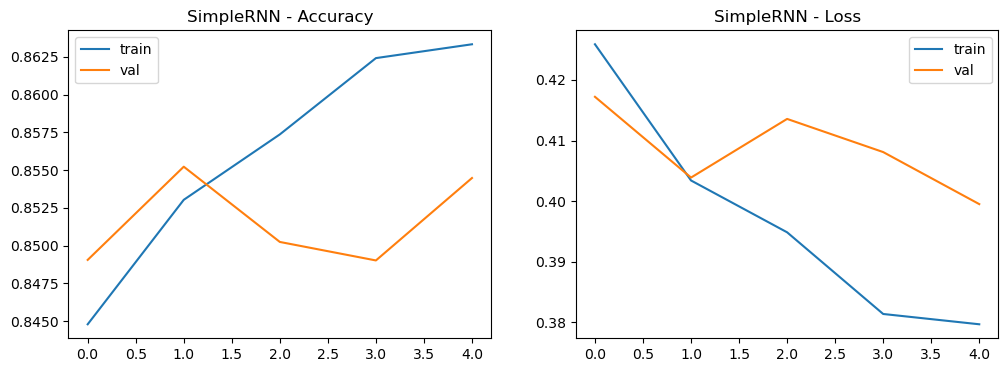

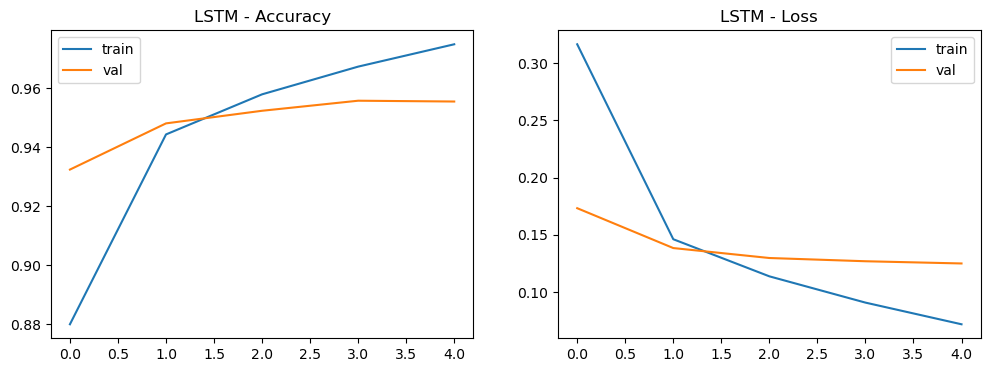

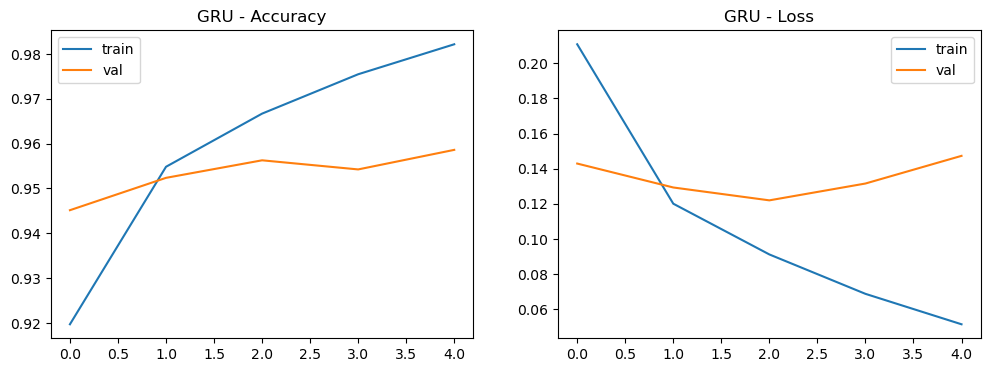

In [12]:
import matplotlib.pyplot as plt

def plot_history(hist, title):
    plt.figure(figsize=(12,4))
    
    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(hist.history['accuracy'], label='train')
    plt.plot(hist.history['val_accuracy'], label='val')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(hist.history['loss'], label='train')
    plt.plot(hist.history['val_loss'], label='val')
    plt.title(f'{title} - Loss')
    plt.legend()
    
    plt.show()

plot_history(history_rnn, "SimpleRNN")
plot_history(history_lstm, "LSTM")
plot_history(history_gru, "GRU")
